# **Step 1: Import Libraries**

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,RocCurveDisplay,confusion_matrix,roc_auc_score,roc_curve,classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

# **Step 2: Load Dataset**

In [380]:
df=pd.read_csv('/content/sample_data/dataset/WELFake_Dataset.csv',nrows=1400)
#df=pd.read_csv('/content/WELFake_Dataset.csv',skiprows=58982)
#df = pd.read_csv('/content/WELFake_Dataset.csv', errors='coerce')

In [381]:
#df=pd.read_csv('/content/WELFake_Dataset.csv',engine='python', on_bad_lines ='skip')

In [382]:
df.shape

(1400, 4)

In [383]:
df.duplicated().sum()

0

In [384]:
df=df.drop_duplicates()
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
1395,1395,TRUNEWS 10/31/16 Dr. Lance Wallnau | Answered ...,TRUNEWS 10/31/16 Dr. Lance Wallnau | Answered ...,1
1396,1396,SYRIAN REFUGEE Family LIED About BED BUG Infes...,The entitled refugee mentality is becoming the...,1
1397,1397,Britain urges U.S. to come forward with Mideas...,BRUSSELS (Reuters) - Britain s Foreign Secreta...,0
1398,1398,Ravish Kumar’s prime time show nominated for F...,Ravish Kumar’s prime time show nominated for F...,1


In [385]:
df.head(3)


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1


In [386]:
df.tail(3)

,Unnamed: 0,title,text,label
1397,1397,Britain urges U.S. to come forward with Mideas...,BRUSSELS (Reuters) - Britain s Foreign Secreta...,0
1398,1398,Ravish Kumar’s prime time show nominated for F...,Ravish Kumar’s prime time show nominated for F...,1
1399,1399,"Appellate judges Garland, Srinivasan considere...",WASHINGTON (Reuters) - The White House is vett...,0


In [387]:
df['text'][1] #Label 1=Real News

'Did they post their votes for Hillary already?'

In [388]:
df['text'][3] #Label 0=Fake News

'A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”\n\nOver two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.\n\n“I was struck, and struck hard,” Jindal told the pastors. “This was the Son of God, and He had died for our sins.”\n\nJindal’s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to find a political base that could help propel him into the top tier of Republican candidates seeking t

In [389]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1385 non-null   object
 1   text    1400 non-null   object
 2   label   1400 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 32.9+ KB


In [391]:
df.isnull().sum()

title    15
text      0
label     0
dtype: int64

# **Step 3: Handle Null values**

In [392]:
df.fillna(' ',inplace=True)
df.shape

(1400, 3)

In [393]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [394]:
label_status=df['label'].value_counts()
transactions=label_status.index
quantity=label_status.values
quantity
figure=px.pie(df,values=quantity,
             hole=.60,names=quantity,
              title='spam and ham status')
figure.show()


# **Step 4: Create Word Clouds**

In [395]:
df['label']


0       1
1       1
2       1
3       0
4       1
       ..
1395    1
1396    1
1397    0
1398    1
1399    0
Name: label, Length: 1400, dtype: int64

In [396]:
def plot_wordCloud(title, text):
    if not isinstance(text, str) or len(text) == 0:
        raise ValueError("Text data should be a non-empty string.")

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

fake_text = ''.join(df[df['label'] == 0]['text'].astype(str))
real_text = ' '.join(df[df['label'] == 1]['text'].astype(str))

len(fake_text)

2385258

In [397]:
print(type(fake_text), len(fake_text))
print(type(real_text), len(real_text))
df.shape

<class 'str'> 2385258
<class 'str'> 2439643


(1400, 3)

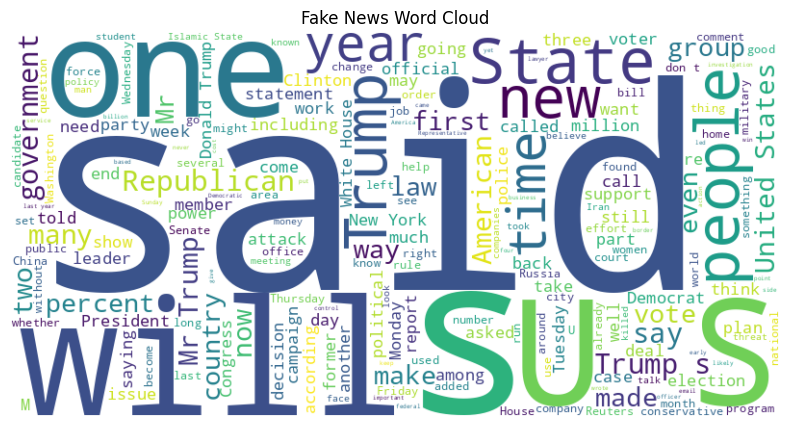

<function matplotlib.pyplot.show(close=None, block=None)>

In [398]:
plot_wordCloud("Fake News Word Cloud", fake_text)
plt.show

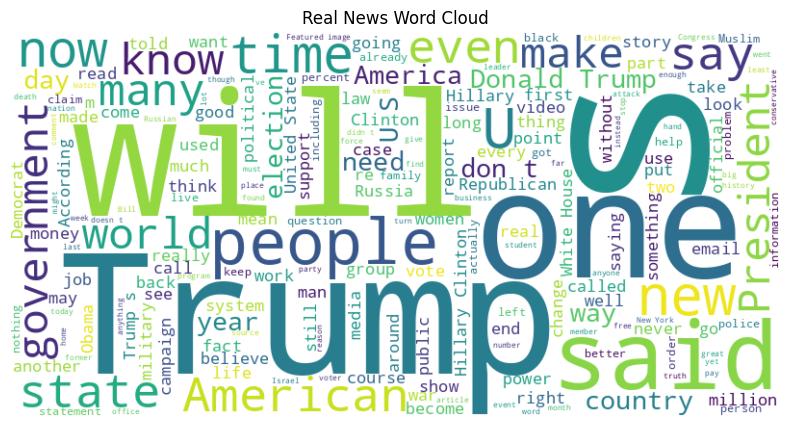

<function matplotlib.pyplot.show(close=None, block=None)>

In [399]:
plot_wordCloud("Real News Word Cloud", real_text)
plt.show

# **Step 5: Text Preprocessing**

In [400]:
df['text_col']=df['text']
df['label_col']=df['label']

In [401]:
nltk.download('stopwords')
stopwords.fileids()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [402]:
stopword=set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Punctuation Remove

In [403]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [404]:
#Punctuation Remove
def preprocess_text(text):
  remove_punc= [char for char in text if char not in string.punctuation]
  clean_words=''.join(remove_punc) #char joining
 #Remove stopwords
  text=([word for word in clean_words.split() if word.lower() not in stopword]) #stopword=stopwords.words('english )
  return text

In [405]:
df['text_col']=df['text_col'].apply(preprocess_text)
df['text_col']

0       [comment, expected, Barack, Obama, Members, FY...
1                         [post, votes, Hillary, already]
2       [demonstrators, gathered, last, night, exercis...
3       [dozen, politically, active, pastors, came, pr...
4       [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                              ...                        
1395    [TRUNEWS, 103116, Dr, Lance, Wallnau, Answered...
1396    [entitled, refugee, mentality, becoming, norm,...
1397    [BRUSSELS, Reuters, Britain, Foreign, Secretar...
1398    [Ravish, Kumar’s, prime, time, show, nominated...
1399    [WASHINGTON, Reuters, White, House, vetting, f...
Name: text_col, Length: 1400, dtype: object

# **Step 6: Lemmatization**

In [406]:
lemmatizer=WordNetLemmatizer()
def lemmatize_text(text):
  lemmatized_text=''.join([lemmatizer.lemmatize(word)for word in text])
  return lemmatized_text
  df['text_col']=df['text_col'].apply(lemmatize_text)


In [407]:
df['text_col']

0       [comment, expected, Barack, Obama, Members, FY...
1                         [post, votes, Hillary, already]
2       [demonstrators, gathered, last, night, exercis...
3       [dozen, politically, active, pastors, came, pr...
4       [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                              ...                        
1395    [TRUNEWS, 103116, Dr, Lance, Wallnau, Answered...
1396    [entitled, refugee, mentality, becoming, norm,...
1397    [BRUSSELS, Reuters, Britain, Foreign, Secretar...
1398    [Ravish, Kumar’s, prime, time, show, nominated...
1399    [WASHINGTON, Reuters, White, House, vetting, f...
Name: text_col, Length: 1400, dtype: object

In [408]:
df['text_col'] = df['text_col'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# **Step 7: TF-IDF Vectorization**

In [409]:
verctorizer=TfidfVectorizer()
x=verctorizer.fit_transform(df['text_col'])
y=df['label']
x.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Step 8: Split dataset into training & testing sets**

In [410]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

# **Step 9: Evaluate Naive Bayes Models**

In [411]:
def evaluate_model (model,xtest,ytest):
  y_pred=model.predict(xtest)
  accuracy=accuracy_score(ytest,y_pred)
  cm=confusion_matrix(ytest,y_pred)
  prob=model.predict_proba(xtest)[:,1]
  roc_auc=roc_auc_score(ytest,prob)
  precision,recall,_=precision_recall_curve(ytest,prob)
  pr_auc=auc(recall,precision)

  return{'Accuracy':accuracy,
         'Confusion Matrix':cm,
         }

# **# Step 10: Build Naive Bayes Models**

In [412]:
#MultinomialNB
modelnb=MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None)
modelnb.fit(xtrain,ytrain)

MultinomialNB()

In [413]:
from sklearn.metrics import precision_recall_curve,auc

In [414]:
nb_result=evaluate_model(modelnb,xtest,ytest)
nb_result

{'Accuracy': 0.8595238095238096,
 'Confusion Matrix': array([[159,  41],
        [ 18, 202]])}

In [415]:
pred=modelnb.predict(xtest)

In [416]:
cm=confusion_matrix(ytest,pred)
cm

array([[159,  41],
       [ 18, 202]])

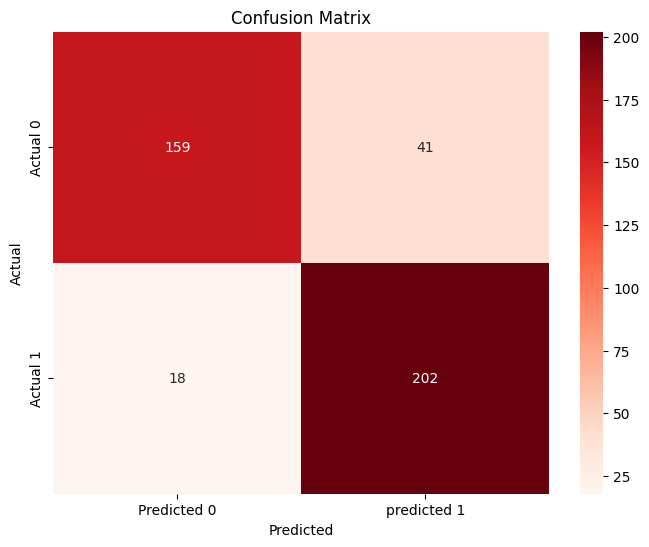

In [417]:
#Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',xticklabels=['Predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [418]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       200
           1       0.83      0.92      0.87       220

    accuracy                           0.86       420
   macro avg       0.86      0.86      0.86       420
weighted avg       0.86      0.86      0.86       420



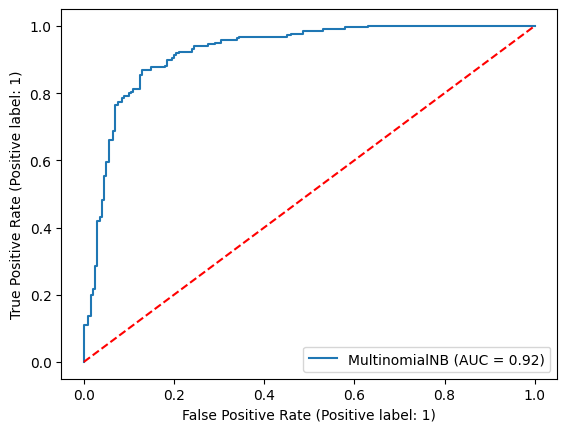

In [419]:
RocCurveDisplay.from_estimator(modelnb,xtest,ytest)
plt.plot([0,1],[0,1],linestyle='--',color='r')

In [420]:
#BernoulliNB Naive Bayes
bou=BernoulliNB()
bou.fit(xtrain,ytrain)

BernoulliNB()

In [421]:
bnb_result=evaluate_model(bou,xtest,ytest)
bnb_result

{'Accuracy': 0.7476190476190476,
 'Confusion Matrix': array([[122,  78],
        [ 28, 192]])}

In [422]:
bou.score(xtest,ytest)

0.7476190476190476

In [423]:
bpred=bou.predict(xtest)

In [424]:
print(classification_report(ytest,bpred))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70       200
           1       0.71      0.87      0.78       220

    accuracy                           0.75       420
   macro avg       0.76      0.74      0.74       420
weighted avg       0.76      0.75      0.74       420



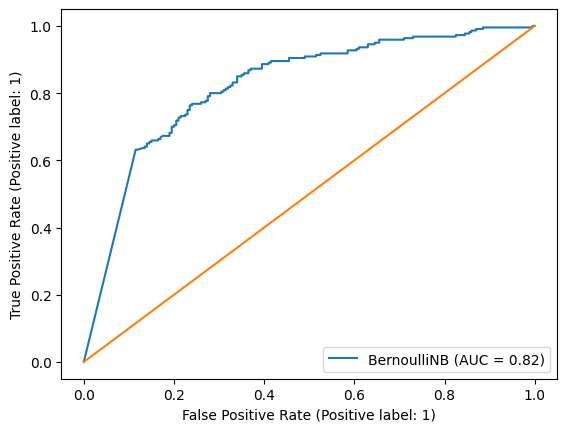

In [425]:
RocCurveDisplay.from_estimator(bou,xtest,ytest)
plt.plot([0,1],[0,1])

In [426]:
from sklearn.metrics import precision_recall_curve,auc

# **Step 11: Apply Logistic Regression Models**

In [427]:
lgr=LogisticRegression(max_iter=1000)

In [428]:
lgr.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [429]:
lg_result=evaluate_model(lgr,xtest,ytest)
lg_result

{'Accuracy': 0.8690476190476191,
 'Confusion Matrix': array([[151,  49],
        [  6, 214]])}

In [430]:
lr_pred=lgr.predict(xtest)

In [431]:
cm_lr=confusion_matrix(lr_pred,ytest)

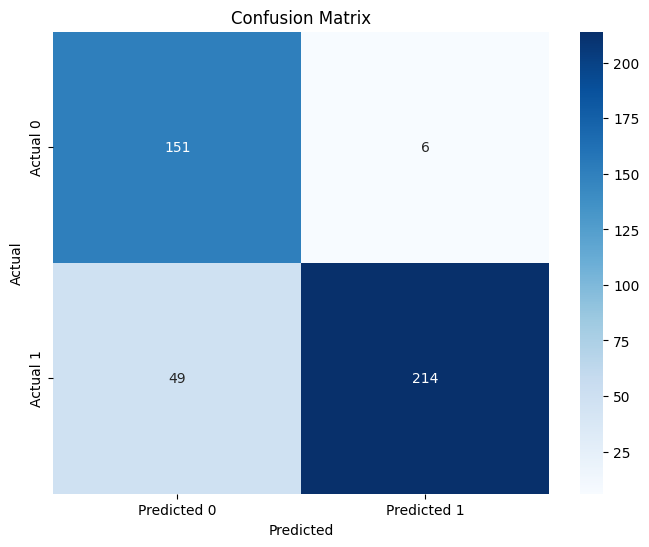

In [432]:
#hearmap for confusion matrics of logistic regression
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Predicted 0','Predicted 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

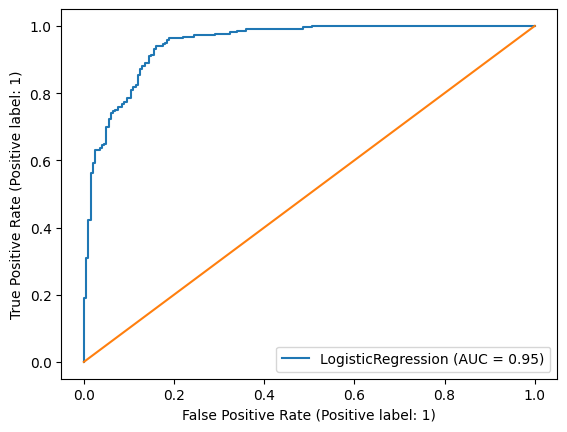

In [433]:
RocCurveDisplay.from_estimator(lgr,xtest,ytest)
plt.plot([0,1],[0,1])

# **Step 12: Apply RandomForestClassifier**

In [434]:
rfc=RandomForestClassifier()

In [435]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [436]:
rfc_results=evaluate_model(rfc,xtest,ytest)
rfc_results

{'Accuracy': 0.8761904761904762,
 'Confusion Matrix': array([[167,  33],
        [ 19, 201]])}

In [437]:
rfc.score(xtest,ytest)

0.8761904761904762

# **Step 13: Visualize performance with histogram**

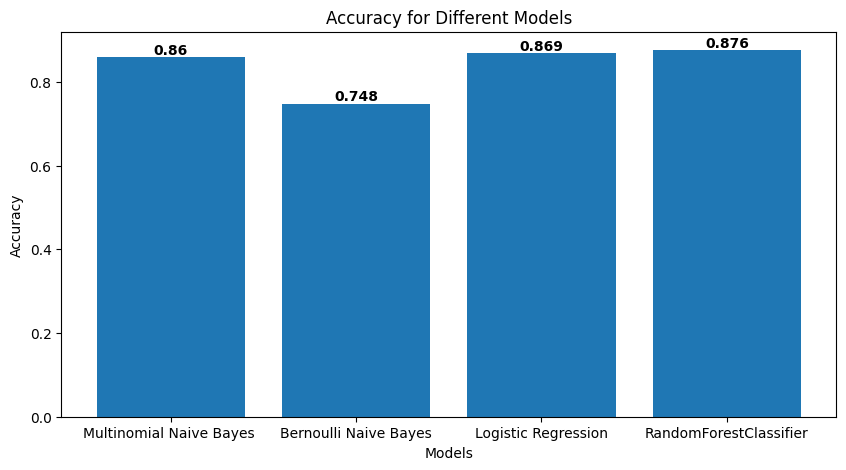

In [438]:
def plot_histogram(metric_values,model_names,metric_name):
  fig,ax=plt.subplots(figsize=(10,5))
  bars=plt.bar(model_names,metric_values)
  plt.xlabel('Models')
  plt.ylabel('Accuracy')
  plt.title(f'{metric_name} for Different Models')

  for bar in bars:
    yval=bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2,yval,round(yval,3),ha='center',va='bottom',color='black',fontweight='bold')
plt.show()
accuracy_values=[nb_result['Accuracy'],bnb_result['Accuracy'],lg_result['Accuracy'],rfc_results['Accuracy']]
model_names=['Multinomial Naive Bayes ','Bernoulli Naive Bayes','Logistic Regression','RandomForestClassifier']
plot_histogram(accuracy_values,model_names,'Accuracy')

# **Step 14: Input random text and make a prediction**

In [439]:
models=[modelnb,bou,lgr,rfc]
models

[MultinomialNB(),
 BernoulliNB(),
 LogisticRegression(max_iter=1000),
 RandomForestClassifier()]

In [440]:
nltk.download('wordnet','omw-1.4','punkt','stopwords')

True

In [441]:
random_text=input()
preprocessed_text=preprocess_text(random_text) #remove puntuation
lemmatized_text=lemmatize_text(preprocessed_text)# text scaling
text_vector=verctorizer.transform([lemmatized_text])

Did they post their votes for Hillary already?


In [442]:
preprocessed_text

['post', 'votes', 'Hillary', 'already']

In [443]:
lemmatized_text

'postvoteHillaryalready'

In [444]:
text_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [445]:
for model in models:
  prediction=model.predict(text_vector)
  print(f'model: {type(model).__name__}')
  print('Prediction:',prediction)
  print('/n')

model: MultinomialNB
Prediction: [1]
/n
model: BernoulliNB
Prediction: [1]
/n
model: LogisticRegression
Prediction: [1]
/n
model: RandomForestClassifier
Prediction: [1]
/n


# **Step 15: Save Good ML Model for Deployment**

In [446]:
import pickle
#Define a file path where want to save the model
model_file_path='RandomForestClassifier.pkl'
#save the model to the file
with open(model_file_path,'wb')as model_file:
  pickle.dump(rfc,model_file)

**Load Model**

In [447]:
with open(model_file_path,'rb')as model_file:
  loaded_LR=pickle.load(model_file)

In [448]:
loaded_LR.predict(xtest)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,

In [449]:
loaded_LR.score(xtest,ytest)

0.8761904761904762

In [450]:
text_vector

<1x40750 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [451]:
loaded_LR.predict(text_vector)

array([1])